<a href="https://colab.research.google.com/github/fakharzadehAmir/Image-Classification/blob/main/ImageClassification_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Get the CIFAR10 dataset for training and testing our CNN model

In [33]:
from keras import datasets, layers, models
(img_train, train_label), (img_test, test_label) = datasets.cifar10.load_data()
img_train, img_test = img_train / 255, img_test / 255
img_train.shape

(50000, 32, 32, 3)

Here we got that by dividing pixel values, we normalize them to the range of 0 to 1

In [34]:
print(img_train[1])
print('min and max values in normalized pixels: ', np.amin(img_train), np.amax(img_train))

[[[0.60392157 0.69411765 0.73333333]
  [0.49411765 0.5372549  0.53333333]
  [0.41176471 0.40784314 0.37254902]
  ...
  [0.35686275 0.37254902 0.27843137]
  [0.34117647 0.35294118 0.27843137]
  [0.30980392 0.31764706 0.2745098 ]]

 [[0.54901961 0.62745098 0.6627451 ]
  [0.56862745 0.6        0.60392157]
  [0.49019608 0.49019608 0.4627451 ]
  ...
  [0.37647059 0.38823529 0.30588235]
  [0.30196078 0.31372549 0.24313725]
  [0.27843137 0.28627451 0.23921569]]

 [[0.54901961 0.60784314 0.64313725]
  [0.54509804 0.57254902 0.58431373]
  [0.45098039 0.45098039 0.43921569]
  ...
  [0.30980392 0.32156863 0.25098039]
  [0.26666667 0.2745098  0.21568627]
  [0.2627451  0.27058824 0.21568627]]

 ...

 [[0.68627451 0.65490196 0.65098039]
  [0.61176471 0.60392157 0.62745098]
  [0.60392157 0.62745098 0.66666667]
  ...
  [0.16470588 0.13333333 0.14117647]
  [0.23921569 0.20784314 0.22352941]
  [0.36470588 0.3254902  0.35686275]]

 [[0.64705882 0.60392157 0.50196078]
  [0.61176471 0.59607843 0.50980392]


So here we found out that this CIFAR10 dataset has 10 classes

In [35]:
print(train_label[:10])
print(np.amin(train_label), np.amax(train_label))

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]
0 9


We want to reshape our train_label to just one array for better access in code

It is [[],[], ..., []] and we want to change it to [ , , ..., ]

In [107]:
train_label = train_label.reshape(-1,)
test_label = test_label.reshape(-1,)
train_label[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

Order of classes are correct based on given labels. check the link for more information:
https://www.cs.toronto.edu/~kriz/cifar.html

6 frog
1 automobile
4 deer


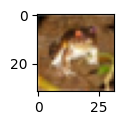

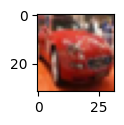

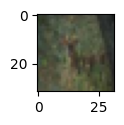

In [37]:
classes_cifar10 = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

def show_image_with_label(index):
  plt.figure(figsize=(4,1))
  plt.imshow(img_train[index])
  print(train_label[index], classes_cifar10[train_label[index]])

show_image_with_label(0)
show_image_with_label(5)
show_image_with_label(10)

In [67]:
def show_loss_accuracy_plot(models_history):
  fig, axs = plt.subplots(1, 2, figsize=(12, 4))
  axs[0].plot(models_history.history['accuracy'], label='Training Accuracy', marker='o')
  if 'val_accuracy' in models_history.history:
      axs[0].plot(models_history.history['val_accuracy'], label='Validation Accuracy', marker='x')
  axs[0].set_title('Model Accuracy Across Epochs')
  axs[0].set_xlabel('Epoch')
  axs[0].set_ylabel('Accuracy')
  axs[0].legend(loc='upper left')
  axs[0].grid(True)
  axs[0].set_xticks(range(len(models_history.history['accuracy'])))
  axs[0].set_xticklabels(range(1, len(models_history.history['accuracy']) + 1))

  axs[1].plot(models_history.history['loss'], label='Training Loss', marker='o', color='red')
  if 'val_loss' in models_history.history:
      axs[1].plot(models_history.history['val_loss'], label='Validation Loss', marker='x', color='green')
  axs[1].set_title('Model Loss Across Epochs')
  axs[1].set_xlabel('Epoch')
  axs[1].set_ylabel('Loss')
  axs[1].legend(loc='upper right')
  axs[1].grid(True)
  axs[1].set_xticks(range(len(models_history.history['loss'])))
  axs[1].set_xticklabels(range(1, len(models_history.history['loss']) + 1))

  plt.tight_layout()
  return plt.show()

In [48]:
ann1 = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(5000, activation='relu'),
    layers.Dense(500, activation='relu'),
    layers.Dense(10, activation='softmax')
])
ann1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_ann1 = ann1.fit(img_train, train_label, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 13s 8ms/step - loss: 1.9031 - accuracy: 0.3247
Epoch 2/5
1563/1563 [==============================] - 15s 10ms/step - loss: 1.6651 - accuracy: 0.4024
Epoch 3/5
1563/1563 [==============================] - 20s 13ms/step - loss: 1.5880 - accuracy: 0.4321
Epoch 4/5
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5341 - accuracy: 0.4530
Epoch 5/5
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4955 - accuracy: 0.4669


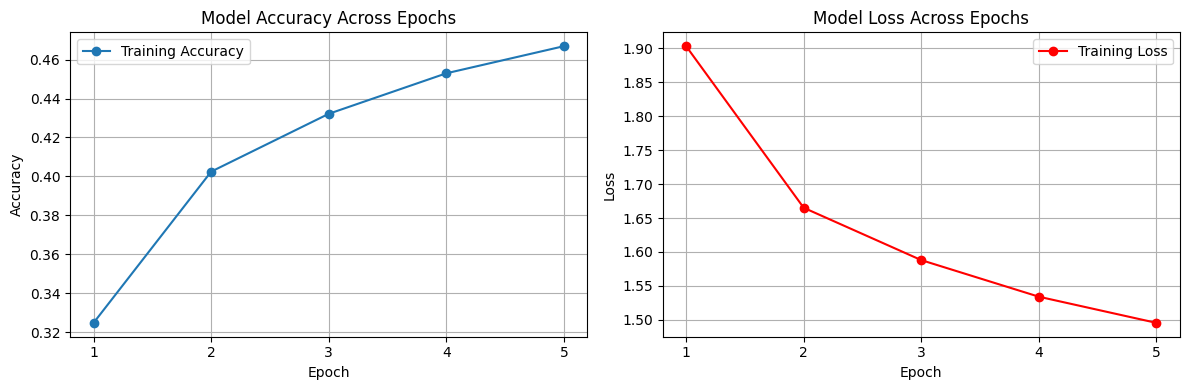

In [68]:
show_loss_accuracy_plot(history_ann1)

In [53]:
ann2 = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(5000, activation='relu'),
    layers.Dense(500, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])
ann2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_ann2 = ann2.fit(img_train, train_label, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 13s 7ms/step - loss: 1.9213 - accuracy: 0.3226
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.6596 - accuracy: 0.4039
Epoch 3/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.5707 - accuracy: 0.4387
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.5150 - accuracy: 0.4553
Epoch 5/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.4736 - accuracy: 0.4706
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.4408 - accuracy: 0.4829
Epoch 7/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.4117 - accuracy: 0.4958
Epoch 8/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3861 - accuracy: 0.5050
Epoch 9/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3607 - accuracy: 0.5115
Epoch 10/10
1563/1563 [==============================] - 12s 7ms/step - l

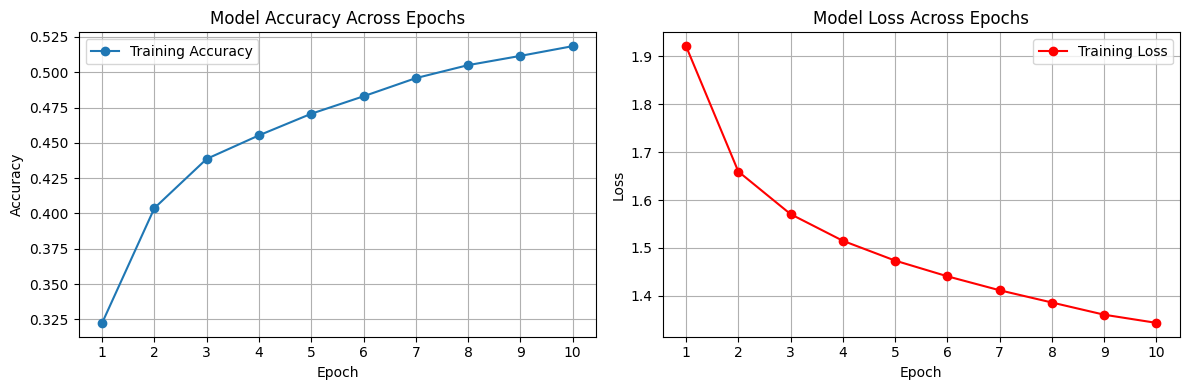

In [69]:
show_loss_accuracy_plot(history_ann2)

In [51]:
cnn1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_cnn1 = cnn1.fit(img_train, train_label, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 12s 6ms/step - loss: 1.4198 - accuracy: 0.4903
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0438 - accuracy: 0.6348
Epoch 3/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8968 - accuracy: 0.6894
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7963 - accuracy: 0.7235
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7023 - accuracy: 0.7546
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6233 - accuracy: 0.7829
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5493 - accuracy: 0.8074
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4804 - accuracy: 0.8311
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4140 - accuracy: 0.8552
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0

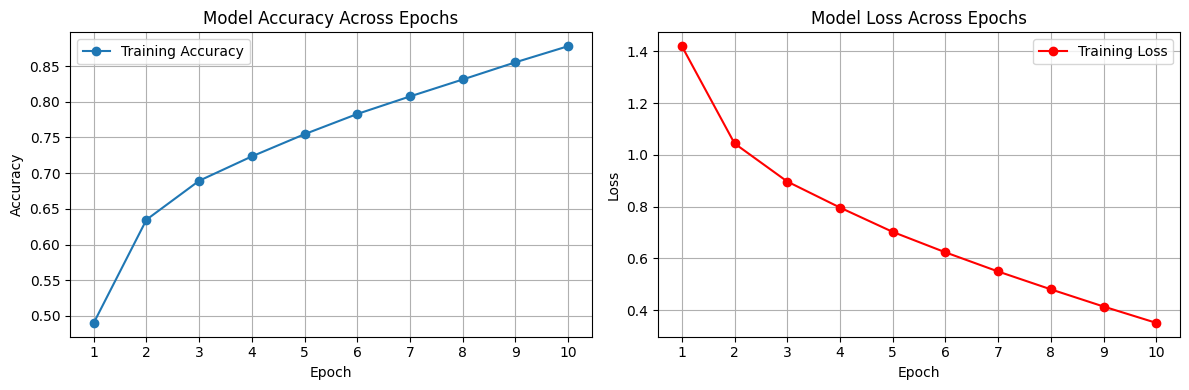

In [70]:
show_loss_accuracy_plot(history_cnn1)

In [55]:
cnn2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_cnn2 = cnn2.fit(img_train, train_label, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 11s 6ms/step - loss: 1.2424 - accuracy: 0.5748
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8340 - accuracy: 0.7091
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6542 - accuracy: 0.7699
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5155 - accuracy: 0.8210
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3624 - accuracy: 0.8738
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2535 - accuracy: 0.9107
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1934 - accuracy: 0.9324
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1536 - accuracy: 0.9464
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1326 - accuracy: 0.9551
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.10

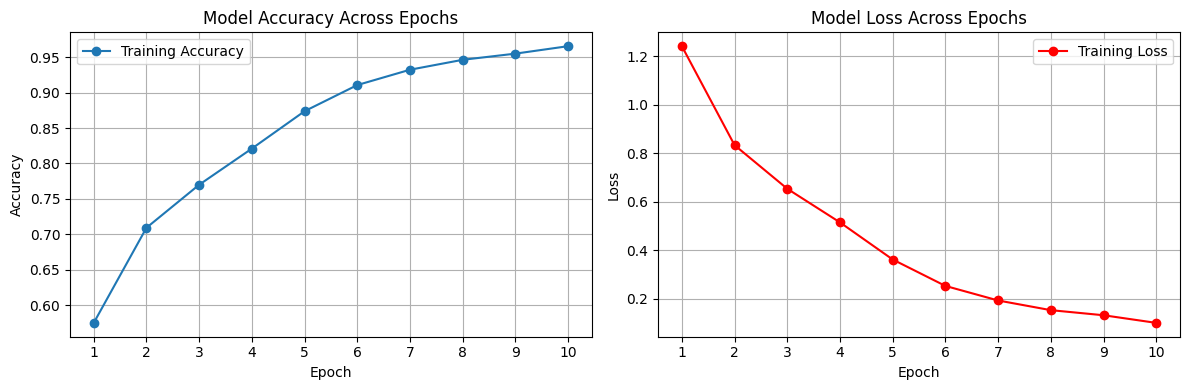

In [71]:
show_loss_accuracy_plot(history_cnn2)

In [57]:
cnn3 = models.Sequential([
    layers.Conv2D(32, (5, 5), activation='tanh', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (5, 5), activation='tanh'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn3.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_cnn3 = cnn3.fit(img_train, train_label, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 8s 4ms/step - loss: 1.6360 - accuracy: 0.4278
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2926 - accuracy: 0.5556
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1625 - accuracy: 0.6029
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0763 - accuracy: 0.6306
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0041 - accuracy: 0.6594
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9444 - accuracy: 0.6780
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8884 - accuracy: 0.6974
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8283 - accuracy: 0.7162
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7774 - accuracy: 0.7336
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.727

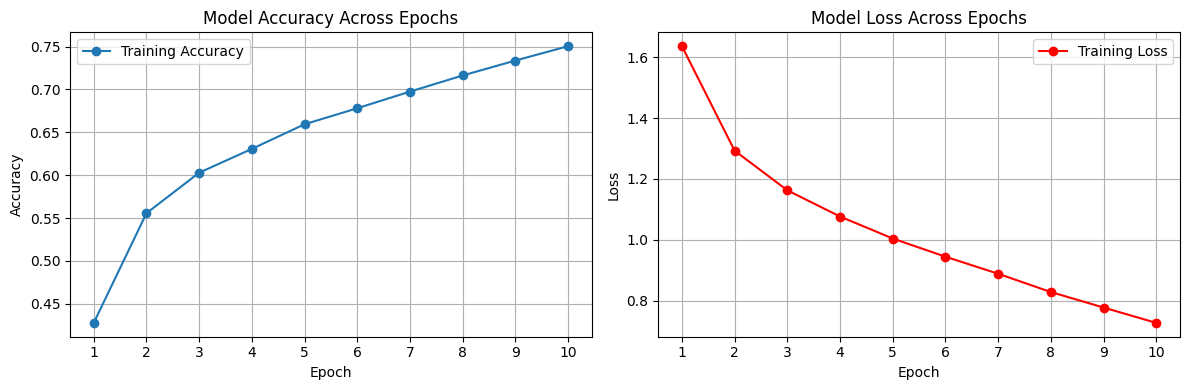

In [72]:
show_loss_accuracy_plot(history_cnn3)

In [59]:
cnn4 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])
cnn4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_cnn4 = cnn4.fit(img_train, train_label, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 12s 6ms/step - loss: 1.7096 - accuracy: 0.3660
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2411 - accuracy: 0.5607
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0079 - accuracy: 0.6493
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8767 - accuracy: 0.6964
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7834 - accuracy: 0.7299
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7080 - accuracy: 0.7571
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6392 - accuracy: 0.7796
Epoch 8/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5850 - accuracy: 0.7981
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5437 - accuracy: 0.8090
Epoch 10/10
1563/1563 [==============================] - 10s 6ms/step - los

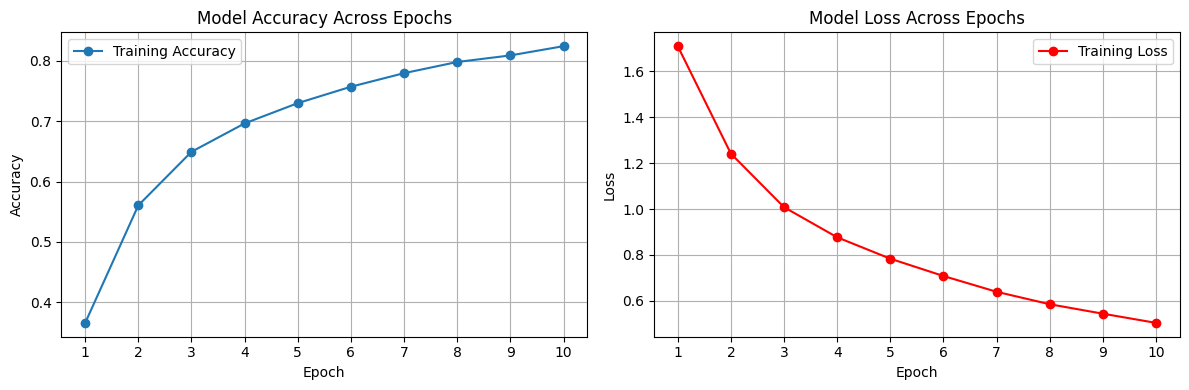

In [73]:
show_loss_accuracy_plot(history_cnn4)

In [61]:
cnn5 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_cnn5 = cnn5.fit(img_train, train_label, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 17s 9ms/step - loss: 1.6006 - accuracy: 0.5472
Epoch 2/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8349 - accuracy: 0.7103
Epoch 3/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6557 - accuracy: 0.7753
Epoch 4/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.4957 - accuracy: 0.8291
Epoch 5/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.3640 - accuracy: 0.8755
Epoch 6/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.2642 - accuracy: 0.9104
Epoch 7/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1938 - accuracy: 0.9331
Epoch 8/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1726 - accuracy: 0.9423
Epoch 9/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1359 - accuracy: 0.9561
Epoch 10/20
1563/1563 [==============================] - 13s 8ms/step - l

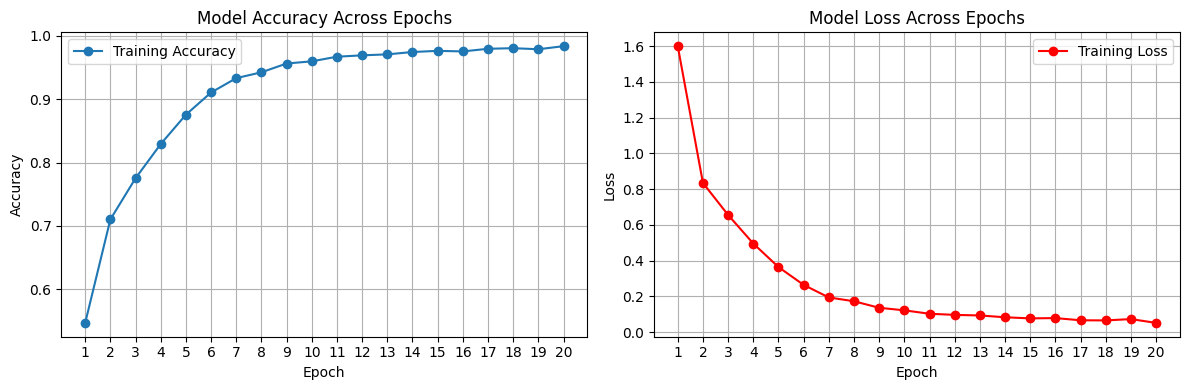

In [74]:
show_loss_accuracy_plot(history_cnn5)

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def calculate_metrics(model, x_test, y_test):
    predictions = model.predict(x_test)
    predicted_classes = np.argmax(predictions, axis=1)

    true_classes = y_test

    accuracy = accuracy_score(true_classes, predicted_classes)
    precision = precision_score(true_classes, predicted_classes, average='weighted', zero_division=0)
    recall = recall_score(true_classes, predicted_classes, average='weighted', zero_division=0)
    f1 = f1_score(true_classes, predicted_classes, average='weighted', zero_division=0)
    return accuracy, precision, recall, f1

In [110]:
models = [ann1, ann2, cnn1, cnn2, cnn3, cnn4, cnn5]
model_names = ['ANN_1', 'ANN_2', 'CNN_1', 'CNN_2', 'CNN_3', 'CNN_4', 'CNN_5']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

results = {name: [] for name in metrics}

for model in models:
    accuracy, precision, recall, f1 = calculate_metrics(model, img_test, test_label)
    results['Accuracy'].append(accuracy * 100)
    results['Precision'].append(precision * 100)
    results['Recall'].append(recall * 100)
    results['F1-Score'].append(f1 * 100)

313/313 [==============================] - 1s 3ms/step


<ipython-input-111-d6de92dc2e3e>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(model_names, rotation=45)


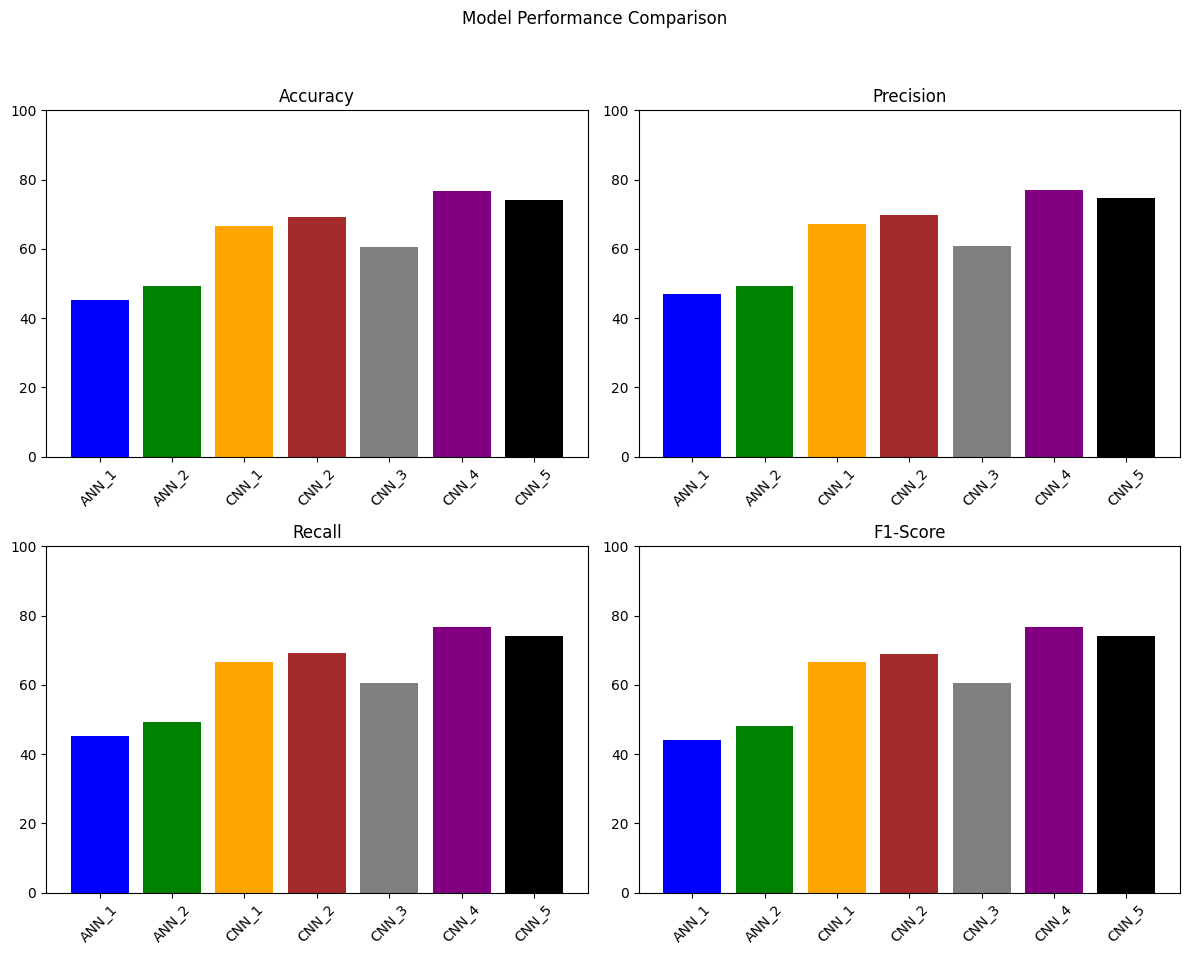

In [111]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Model Performance Comparison')

for ax, metric in zip(axs.flat, metrics):
    ax.bar(model_names, results[metric], color=['blue', 'green', 'orange', 'brown', 'grey', 'purple', 'black'])
    ax.set_title(metric)
    ax.set_xticklabels(model_names, rotation=45)
    ax.set_ylim([0, 100])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [80]:
from sklearn.metrics import classification_report

models = [ann1, ann2, cnn1, cnn2, cnn3, cnn4, cnn5]
model_names = ['ANN_1', 'ANN_2', 'CNN_1', 'CNN_2', 'CNN_3', 'CNN_4', 'CNN_5']

def predict_classes(model, image_test):
    predictions = model.predict(image_test)
    return [np.argmax(element) for element in predictions]

for model, name in zip(models, model_names):
    y_pred_classes = predict_classes(model, img_test)
    print(f"Classification Report for {name}: \n{classification_report(test_label, y_pred_classes)}\n")

313/313 [==============================] - 1s 2ms/step
Classification Report for ANN_1: 
              precision    recall  f1-score   support

           0       0.63      0.43      0.51      1000
           1       0.66      0.34      0.45      1000
           2       0.40      0.23      0.29      1000
           3       0.33      0.34      0.34      1000
           4       0.42      0.33      0.37      1000
           5       0.42      0.27      0.33      1000
           6       0.47      0.56      0.51      1000
           7       0.40      0.64      0.49      1000
           8       0.52      0.67      0.59      1000
           9       0.42      0.70      0.52      1000

    accuracy                           0.45     10000
   macro avg       0.47      0.45      0.44     10000
weighted avg       0.47      0.45      0.44     10000


313/313 [==============================] - 1s 2ms/step
Classification Report for ANN_2: 
              precision    recall  f1-score   support

       

In [92]:
f1_scores = {name: {} for name in model_names}
precision_scores = {name: {} for name in model_names}
recall_scores = {name: {} for name in model_names}
overall_accuracy = []

for model, name in zip(models, model_names):
    y_pred_classes = predict_classes(model, img_test)
    report = classification_report(test_label, y_pred_classes, output_dict=True)
    overall_accuracy.append(report['accuracy'])
    for class_id, metrics in report.items():
        if class_id.isdigit():
            f1_scores[name][class_id] = metrics['f1-score']
            precision_scores[name][class_id] = metrics['precision']
            recall_scores[name][class_id] = metrics['recall']

313/313 [==============================] - 1s 3ms/step


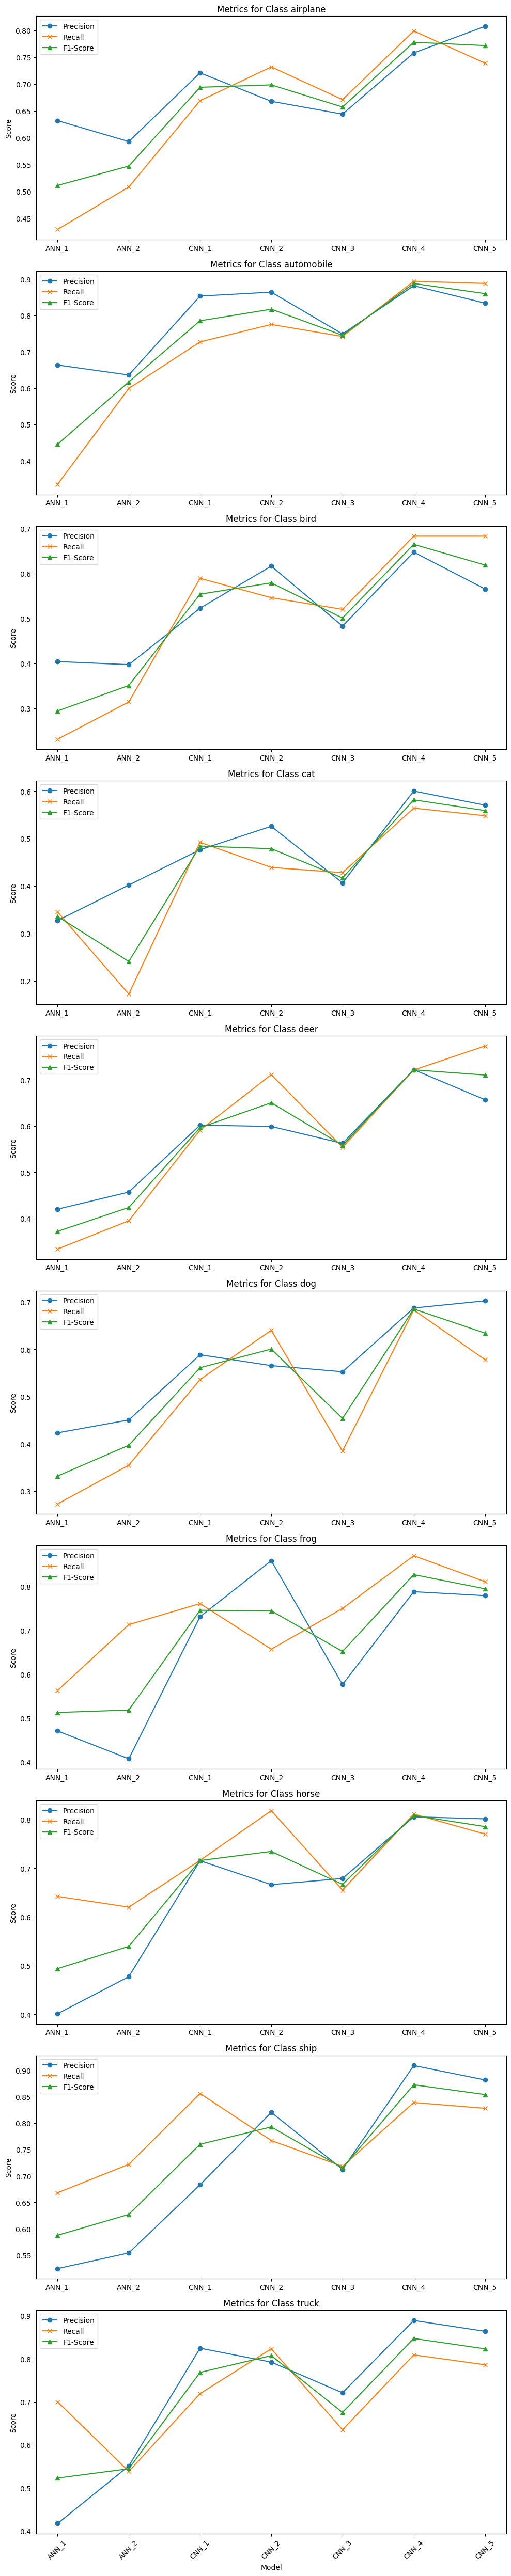

In [96]:
classes = list(f1_scores[model_names[0]].keys())
n_classes = len(classes)

fig, axs = plt.subplots(n_classes, 1, figsize=(10, n_classes * 5))

for idx, class_id in enumerate(classes):
    f1_for_class = [f1_scores[name][class_id] for name in model_names]
    precision_for_class = [precision_scores[name][class_id] for name in model_names]
    recall_for_class = [recall_scores[name][class_id] for name in model_names]

    axs[idx].plot(model_names, precision_for_class, marker='o', label='Precision')
    axs[idx].plot(model_names, recall_for_class, marker='x', label='Recall')
    axs[idx].plot(model_names, f1_for_class, marker='^', label='F1-Score')

    axs[idx].set_title(f'Metrics for Class {classes_cifar10[int(class_id)]}')
    axs[idx].set_ylabel('Score')
    axs[idx].legend()

plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Now we want to test our models just (cnn4 and ann1) to know if our models are working correctly.

In [98]:
import requests
from keras import preprocessing
from PIL import Image
from io import BytesIO

In [102]:
image_url = "https://cdn.britannica.com/41/123141-050-E6229449/Air-New-Zealand-Boeing-747-400.jpg"
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))
img = img.resize((32, 32))
img_array = preprocessing.image.img_to_array(img)
img_array /= 255.0
img_batch = np.expand_dims(img_array, axis=0)

In [105]:
predictions = ann1.predict(img_batch)
predicted_class = np.argmax(predictions[0])
print("Predicted class (ann):", classes_cifar10[predicted_class])

predictions = cnn3.predict(img_batch)
predicted_class = np.argmax(predictions[0])
print("Predicted class (cnn):", classes_cifar10[predicted_class]) # This one predicted correctly

1/1 [==============================] - 0s 20ms/step
Predicted class (ann): ship
1/1 [==============================] - 0s 20ms/step
Predicted class (cnn): airplane


1/1 [==============================] - 0s 19ms/step


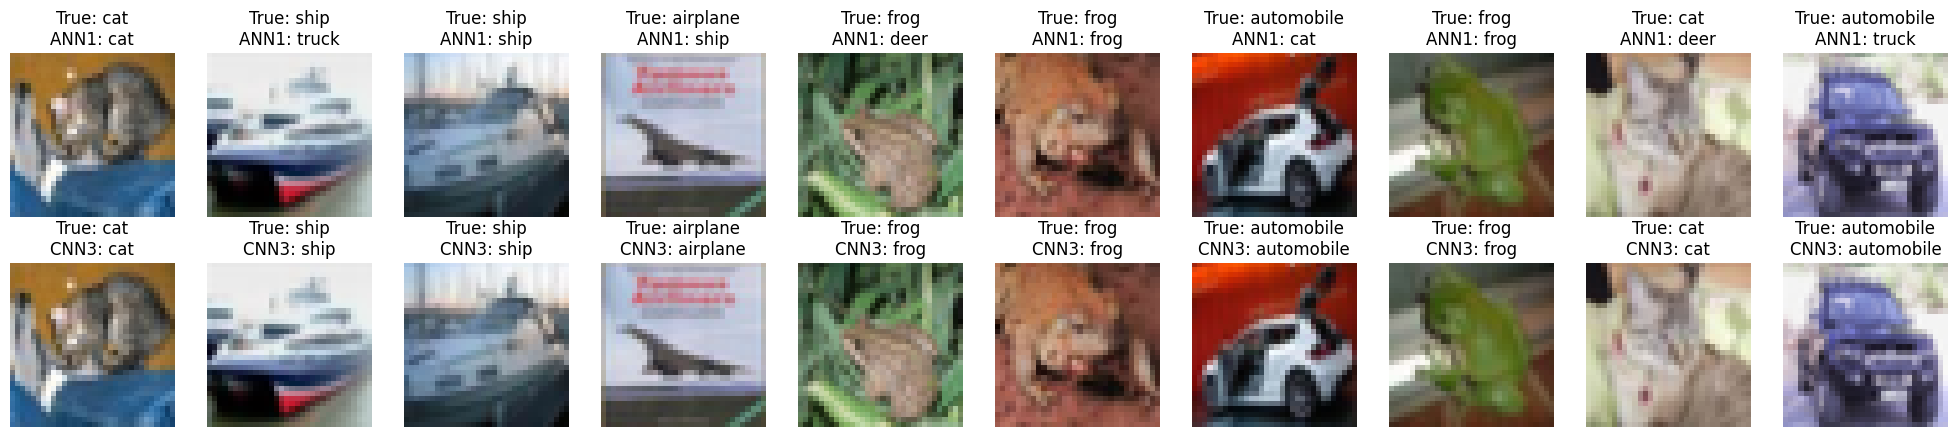

In [108]:
y_pred_ann1 = np.argmax(ann1.predict(img_test[:10]), axis=1)
y_pred_cnn3 = np.argmax(cnn3.predict(img_test[:10]), axis=1)

true_classes = test_label[:10].flatten()

fig, axs = plt.subplots(2, 10, figsize=(25, 5))

for i in range(10):
    axs[0, i].imshow(img_test[i])
    axs[0, i].set_title(f"True: {classes_cifar10[true_classes[i]]}\nANN1: {classes_cifar10[y_pred_ann1[i]]}")
    axs[0, i].axis('off')

    axs[1, i].imshow(img_test[i])
    axs[1, i].set_title(f"True: {classes_cifar10[true_classes[i]]}\nCNN3: {classes_cifar10[y_pred_cnn3[i]]}")
    axs[1, i].axis('off')

plt.show()
